In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 28.0MB/s 


In [0]:
downloaded = drive.CreateFile({'id':'1w_8MMe6uIwTejIVOEp8o60oc71USmCLw'}) 
downloaded.GetContentFile('logs')  


**Т.к. есть ограничение по оперативной памяти одновременно подгружаются только 17млн первых запросов. Они и использованы для анализа и фильтрации. **

---



In [0]:
import pandas as pd
data = pd.DataFrame([i[:-1].split('\t') for i in open('logs').readlines()[1:17000000]], columns = ['text', 'data'])
print(data.shape)
data.head()

(16999999, 2)


,text,data
0,datakam,2018-06-17 09:30:32
1,yuxuda kız usagi gormek,2018-06-17 09:30:32
2,порно,2018-06-17 09:30:32
3,цефотаксим,2018-06-17 09:30:32
4,вертикальном цилиндрическом сосуде над поршнем...,2018-06-17 09:30:32


In [0]:
words_fwc = [ 'футбол', 'чемпионат','чм', 'матч', 'финал','полуфинал', '1 4', '1 2', '1 8']
words_fwatch = [ 'трансляция матча', 'трансляция чм', 'результаты чм', 'смотреть чм', 'смотреть россия','смотреть матч', 'смотреть чм', 'эфир матч', 'эфир чм','трансляция финал','трансляция футбол', 'смотреть футбол', 'запись футбол', 'запись игра','смотреть чемпионат']
words_fschedule = ['турнирная таблица', 'турнирная сетка', 'расписание чм', 'календарь футбол', 'календарь чм', 'календарь чемпионат' 'футбол турнирная таблица','чм турнирная таблица', 'чм турнирная сетка', 'футбол турнирная сетка',]
words_finfo = [ 'статистика матчей','счет футбол', 'счет матча', 'ход матча','счет игра', 'счет россия', 'промежуточные результаты', 'результаты футбол']
words_fplayers = [ 'статистика игроков', 'состав команд', 'статистика команд', 'футбольные игроки', 'футбольный тренер', 'cборная по футболу', 'дзюба', 'головин', 'пике', 'рональдо', "месси", 'акинфеев', 'салах', ]
words_fnews = [ 'новости футбола', 'комментарии футбол', 'обзор матча', 'аналитика чм', 'аналитика матча', 'обзор чм']


In [0]:
al = []
al.extend(words_fwc)
al.extend(words_fwatch)
al.extend(words_fschedule)
al.extend(words_finfo)
al.extend(words_fplayers)
al.extend(words_fnews)
labels = ['wc' for i in range(len(words_fwc))]+['watch' for i in range(len(words_fwatch))]+['schedule' for i in range(len(words_fschedule))]+['info' for i in range(len(words_finfo))]+['players' for i in range(len(words_fplayers))]+['news' for i in range(len(words_fnews))]
f_dict = list(zip(al, labels))
f_dict.sort(key=lambda t: len(t[0]), reverse=True)
f_dict[1:]

[('промежуточные результаты', 'info'),
 ('футбол турнирная сетка', 'schedule'),
 ('чм турнирная таблица', 'schedule'),
 ('смотреть чемпионат', 'watch'),
 ('чм турнирная сетка', 'schedule'),
 ('статистика игроков', 'players'),
 ('cборная по футболу', 'players'),
 ('комментарии футбол', 'news'),
 ('трансляция футбол', 'watch'),
 ('турнирная таблица', 'schedule'),
 ('статистика матчей', 'info'),
 ('результаты футбол', 'info'),
 ('статистика команд', 'players'),
 ('футбольные игроки', 'players'),
 ('футбольный тренер', 'players'),
 ('трансляция матча', 'watch'),
 ('трансляция финал', 'watch'),
 ('календарь футбол', 'schedule'),
 ('смотреть россия', 'watch'),
 ('смотреть футбол', 'watch'),
 ('турнирная сетка', 'schedule'),
 ('новости футбола', 'news'),
 ('аналитика матча', 'news'),
 ('трансляция чм', 'watch'),
 ('результаты чм', 'watch'),
 ('смотреть матч', 'watch'),
 ('запись футбол', 'watch'),
 ('расписание чм', 'schedule'),
 ('состав команд', 'players'),
 ('календарь чм', 'schedule'),
 (

In [0]:
def filter(text):
  f = []
  for word, label in f_dict[1:]:
    if word in text:
      f.append(label)
  if len(f)!=0:
    return f[0]
  else:
    return 1
    
data['labels'] = data.text.apply(filter)


In [0]:
f_data = data[data.labels!=1]
print(f_data.shape)
f_data.head()

(458179, 3)


,text,data,labels
84,чемпионат мира по футболу 2018,2018-06-17 09:23:58,wc
103,поделки к футболу,2018-06-17 09:23:59,wc
145,чемпионат мира по футболу 2018,2018-06-17 09:24:02,wc
157,состав мексики по футболу 218,2018-06-17 09:24:03,wc
213,мач месси,2018-06-17 09:24:07,players


In [0]:
f_data.tail()

,text,data,labels
16999746,как понять 1 2 в стрижках,2018-06-19 15:20:21,wc
16999854,беспорядки футбольных фанатов в москве,2018-06-19 15:20:25,wc
16999972,м салах,2018-06-19 15:20:30,players
16999981,матч тв,2018-06-19 15:20:31,wc
16999987,прямая трансляция чм по футболу 2018 смотреть ...,2018-06-19 15:20:31,watch


In [0]:
f_data = f_data.reset_index()
def d(x):
  s = x[:10].split('-')
  return s[1]+s[2]
f_data['d'] = f_data['data'].apply(d)
f_data.head()

,index,text,data,labels,d
0,84,чемпионат мира по футболу 2018,2018-06-17 09:23:58,wc,0617
1,103,поделки к футболу,2018-06-17 09:23:59,wc,0617
2,145,чемпионат мира по футболу 2018,2018-06-17 09:24:02,wc,0617
3,157,состав мексики по футболу 218,2018-06-17 09:24:03,wc,0617
4,213,мач месси,2018-06-17 09:24:07,players,0617


In [0]:
pr_data = f_data[['labels', 'text']].groupby(['labels'])
for i, val in pr_data:
  print(i)
  print(set(val.text.tolist()[:250]))
  print('###########')

info
{'счет россия испания чемпионат мира', 'счет матча россия испания футбол 2018', 'счет россия и испания футбол 2018', 'счет матча россия саудовская аравия сегодня', 'какой счет россия испания футбол', 'статистика матчей франция аргентина', 'какой счет россия с испанией 2018 прямой эфир', 'какой счет матча россия испания', 'результаты футбол ч м', 'счет матча россия египет футбол 2018', 'счет россия хорватия прямой эфир', 'счет россия испания футбол', 'какой счет футбола сегодня россия хорватия', 'исход матча испания португалия', 'статистика матчей саудовской аравии', 'счет россия саудовская аравия', 'счет россия португалия сегодня', 'счет матча россия испания футбол сейчас', 'какой счет футбола сегодня россия египет', 'счет матча россия', 'статистика матчей россия хорватия', 'счет матча россия хорватия 2018', 'результаты футбола 6 07 2018', 'случайно выскочил счет россия хорватия фото', 'сообщить счет матча англия тунис', 'какой счет футбола сегодня россия', 'какой счет россия сауд

In [0]:
g_f_data = f_data[['d', 'labels']].groupby(['d', 'labels']).size().reset_index(name='counts')
kkk = g_f_data[g_f_data.counts>2]

In [0]:
gh = kkk.pivot(index='labels', columns='d', values='counts')
gh.head()

d,0614,0615,0616,0617,0618,0619,0620,0621,0622,0623,...,0706,0707,0708,0709,0710,0711,0712,0713,0714,0715
labels,,,,,,,,,,,,,,,,,,,,,
info,278,75,45,50,29,192,157,36,23,26,...,70,419,382,24,25,36,27,14,30,63
news,84,82,82,50,40,54,98,41,31,36,...,54,55,80,20,26,31,64,17,38,42
players,697,688,437,326,262,836,849,406,316,174,...,523,992,1392,670,465,334,288,255,333,332
schedule,460,553,616,732,586,798,1430,927,1084,891,...,901,768,509,193,252,284,332,185,307,303
watch,1264,548,413,280,262,1388,470,236,217,220,...,579,2217,175,56,237,217,69,41,338,616


In [0]:
gh = gh.fillna(0.1)
gh = gh.reset_index()

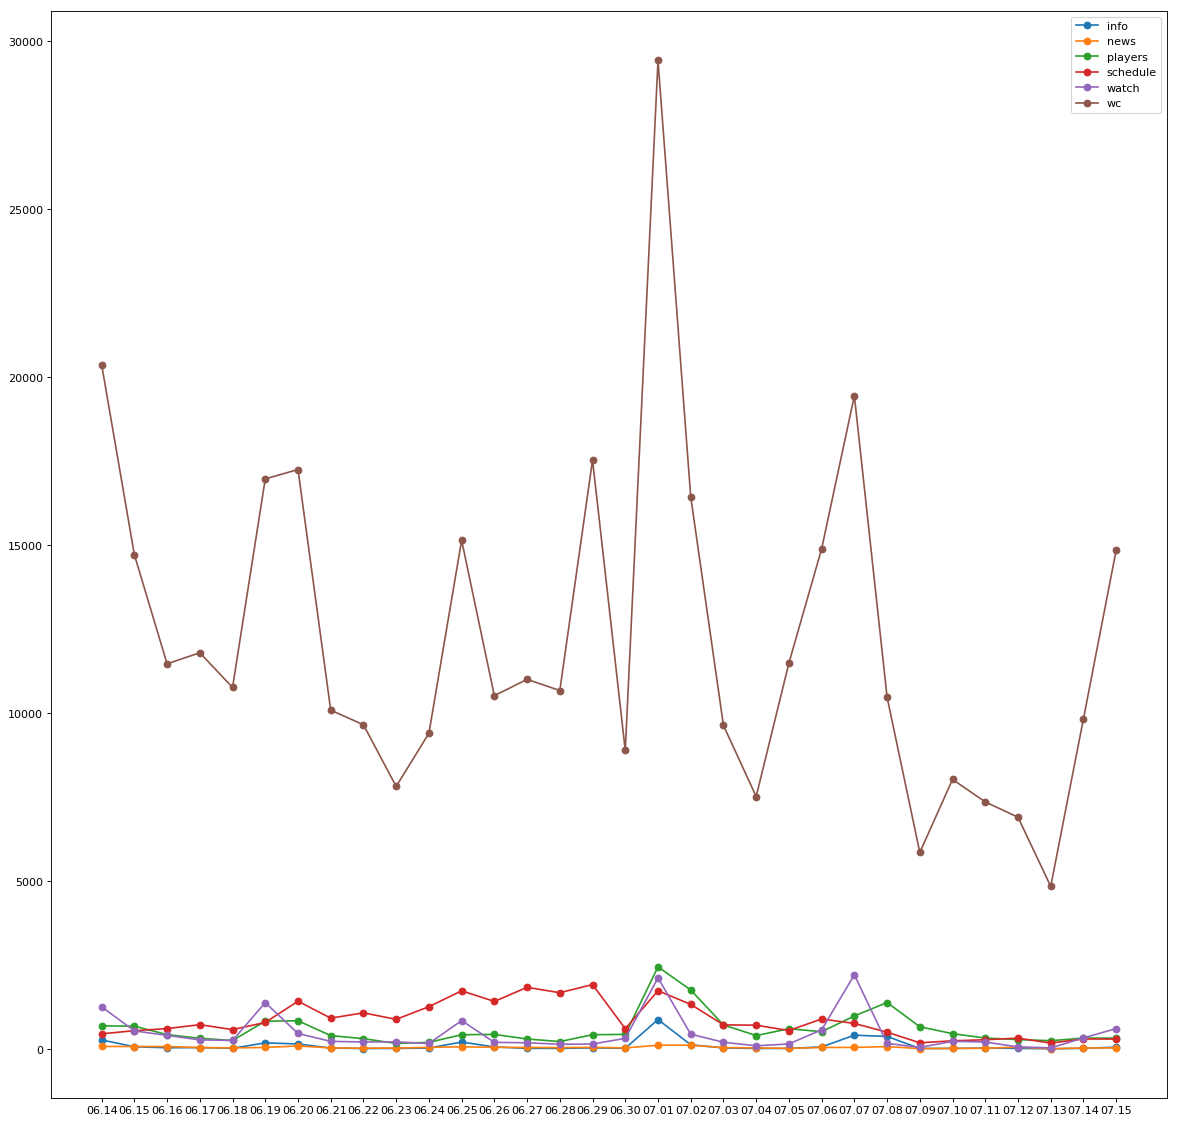

In [0]:
x = [i for i in range(32)]
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 18), dpi=80, facecolor='w', edgecolor='k')
for indx,i in enumerate(gh.values):
  plt.plot(x, i[1:], '-o', label = i[0])
plt.xticks(x, (str(i[:2])+'.'+str(i[2:]) for i in gh.columns[1:]))
plt.legend()
plt.show()

**В первом графике видим распределение запросов по всем 6 группам.  Во втором 5 групп без "общей" группы всех запросов по тематике чм по футболу**

---



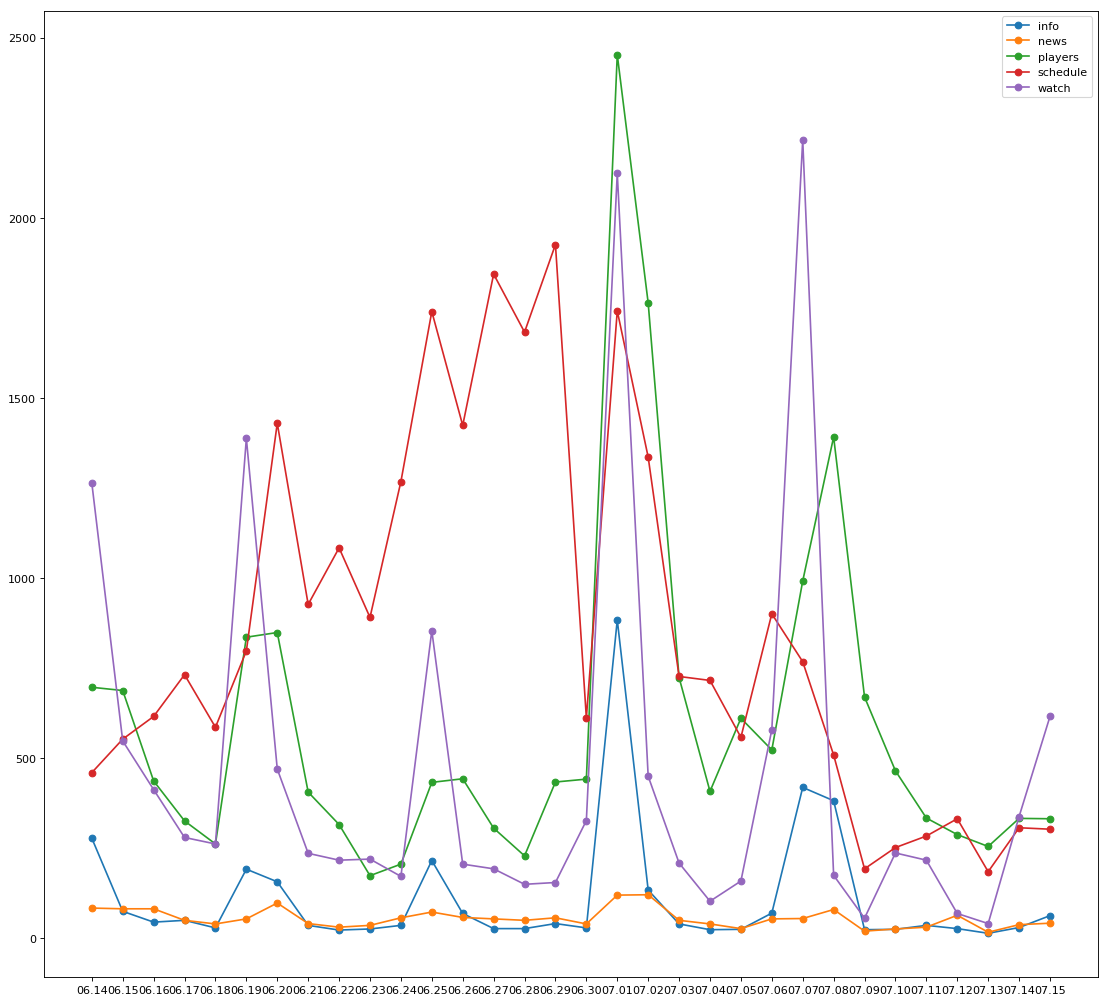

In [0]:
x = [i for i in range(32)]
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(17, 16), dpi=80, facecolor='w', edgecolor='k')
for indx,i in enumerate(gh.values[:-1]):
  plt.plot(x, i[1:], '-o', label = i[0])
plt.xticks(x, (str(i[:2])+'.'+str(i[2:]) for i in gh.columns[1:]))
plt.legend()
plt.show()